# Olympics data Analysis
# ------------------------------
## 1) Drop duplicates
## 2) Dummies to int

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt


In [1]:

import numpy as np
import pandas as pd
import plotly.express as px
from matplotlib import pyplot as plt
import seaborn as sns
athlete_path="/content/athlete_events.csv"
athlete_df=pd.read_csv(athlete_path)
region_path="/content/noc_regions.csv"
region_df=pd.read_csv(region_path)


In [5]:
athlete_df = athlete_df.merge(region_df, on="NOC", how="left")
df=athlete_df

In [ ]:

region_df.head()

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


In [ ]:
athlete_df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [ ]:
pd.Series(athlete_df["Year"].unique()).sort_values(ascending=False).to_numpy()

array([2016, 2014, 2012, 2010, 2008, 2006, 2004, 2002, 2000, 1998, 1996,
       1994, 1992, 1988, 1984, 1980, 1976, 1972, 1968, 1964, 1960, 1956,
       1952, 1948, 1936, 1932, 1928, 1924, 1920, 1912, 1908, 1906, 1904,
       1900, 1896])

In [ ]:
region_df.head()

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


In [ ]:
athlete_df = athlete_df.merge(region_df, on="NOC", how="left")

In [ ]:
athlete_df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN


In [ ]:
athlete_df["region"].unique().shape # total participating countries

(206,)

In [ ]:
athlete_df.isnull().sum()

,0
ID,0
Name,0
Sex,0
Age,9474
Height,60171
Weight,62875
Team,0
NOC,0
Games,0
Year,0


## 1) Drop duplicate

In [ ]:
neww=athlete_df[athlete_df.duplicated()]

In [ ]:
neww.head(5)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
1252,704,Dsir Antoine Acket,M,27.0,NaN,NaN,Belgium,BEL,1932 Summer,1932,Summer,Los Angeles,Art Competitions,"Art Competitions Mixed Painting, Unknown Event",NaN,Belgium,NaN
4282,2449,William Truman Aldrich,M,48.0,NaN,NaN,United States,USA,1928 Summer,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Painting, Drawings And ...",NaN,USA,NaN
4283,2449,William Truman Aldrich,M,48.0,NaN,NaN,United States,USA,1928 Summer,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Painting, Drawings And ...",NaN,USA,NaN
4862,2777,Hermann Reinhard Alker,M,43.0,NaN,NaN,Germany,GER,1928 Summer,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Architecture, Designs F...",NaN,Germany,NaN
4864,2777,Hermann Reinhard Alker,M,43.0,NaN,NaN,Germany,GER,1928 Summer,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Architecture, Architect...",NaN,Germany,NaN


In [ ]:
athlete_df["Season"].unique()

array(['Summer', 'Winter'], dtype=object)

In [ ]:
athlete_df.duplicated().sum()

1385

In [ ]:
athlete_df.drop_duplicates(inplace=True)

In [ ]:
athlete_df.duplicated().sum()

0

## 2) Dummies to int

In [ ]:
athlete_df=athlete_df[athlete_df["Season"]=="Summer"]
athlete_df.shape

(221167, 17)

In [ ]:
dummiess=pd.get_dummies(athlete_df["Medal"])
dummiess=dummiess.astype(int)  # True False to int
dummiess

,Bronze,Gold,Silver
0,0,0,0
1,0,0,0
2,0,0,0
3,0,1,0
26,0,0,0
...,...,...,...
271106,0,0,0
271107,0,0,0
271108,0,0,0
271109,0,0,0


In [ ]:
dummiess.shape

(221167, 3)

In [ ]:
athlete_df.shape

(221167, 17)

## 3) Concatenate

In [ ]:
athlete_df=pd.concat([athlete_df,dummiess],axis=1)
athlete_df.sample(5)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
187135,94049,Anamarija Petrievi,F,16.0,177.0,63.0,Yugoslavia,YUG,1988 Summer,1988,Summer,Seoul,Swimming,Swimming Women's 200 metres Individual Medley,NaN,Serbia,Yugoslavia,0,0,0
25390,13277,Mauro Bonomi,M,19.0,NaN,NaN,Italy,ITA,1992 Summer,1992,Summer,Barcelona,Football,Football Men's Football,NaN,Italy,NaN,0,0,0
239347,119970,Arne Thomsen,M,26.0,172.0,63.0,Denmark,DEN,1968 Summer,1968,Summer,Mexico City,Gymnastics,Gymnastics Men's Pommelled Horse,NaN,Denmark,NaN,0,0,0
244277,122330,Panagiota Tsitsela,F,16.0,160.0,43.0,Greece,GRE,1988 Summer,1988,Summer,Seoul,Rhythmic Gymnastics,Rhythmic Gymnastics Women's Individual,NaN,Greece,NaN,0,0,0
241166,120801,Yasnier Toledo Lpez,M,22.0,175.0,60.0,Cuba,CUB,2012 Summer,2012,Summer,London,Boxing,Boxing Men's Lightweight,Bronze,Cuba,NaN,1,0,0


In [ ]:
totalmedal=athlete_df.groupby("NOC").sum()[["Gold","Silver","Bronze"]].sort_values("Gold",ascending=False)
totalmedal

,Gold,Silver,Bronze
NOC,,,
USA,2472,1333,1197
URS,832,635,596
GBR,635,729,620
GER,592,538,649
ITA,518,474,454
...,...,...,...
AHO,0,1,0
LBR,0,0,0
LCA,0,0,0


In [ ]:
athlete_df[(athlete_df["NOC"]=="DEN")& (athlete_df["Year"]==1900)].head(10)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN,0,1,0
20551,10837,Jens Peter Berthelsen,M,45.0,NaN,NaN,Denmark,DEN,1900 Summer,1900,Summer,Paris,Fencing,"Fencing Men's Foil, Masters, Individual",NaN,Denmark,NaN,0,0,0
41183,21229,Christian August Christensen,M,23.0,NaN,NaN,Denmark,DEN,1900 Summer,1900,Summer,Paris,Athletics,Athletics Men's 800 metres,NaN,Denmark,NaN,0,0,0
41184,21229,Christian August Christensen,M,23.0,NaN,NaN,Denmark,DEN,1900 Summer,1900,Summer,Paris,Athletics,"Athletics Men's 1,500 metres",NaN,Denmark,NaN,0,0,0
75400,38280,Johannes Gandil,M,26.0,NaN,NaN,Denmark,DEN,1900 Summer,1900,Summer,Paris,Athletics,Athletics Men's 100 metres,NaN,Denmark,NaN,0,0,0
107722,54456,Alexander Viggo Jensen,M,25.0,NaN,NaN,Denmark,DEN,1900 Summer,1900,Summer,Paris,Shooting,"Shooting Men's Free Rifle, Three Positions, 30...",NaN,Denmark,NaN,0,0,0
107723,54456,Alexander Viggo Jensen,M,25.0,NaN,NaN,Denmark,DEN,1900 Summer,1900,Summer,Paris,Shooting,"Shooting Men's Free Rifle, Three Positions, 30...",NaN,Denmark,NaN,0,0,0
107724,54456,Alexander Viggo Jensen,M,25.0,NaN,NaN,Denmark,DEN,1900 Summer,1900,Summer,Paris,Shooting,"Shooting Men's Free Rifle, Kneeling, 300 metres",NaN,Denmark,NaN,0,0,0
107725,54456,Alexander Viggo Jensen,M,25.0,NaN,NaN,Denmark,DEN,1900 Summer,1900,Summer,Paris,Shooting,"Shooting Men's Free Rifle, Prone, 300 metres",NaN,Denmark,NaN,0,0,0
107726,54456,Alexander Viggo Jensen,M,25.0,NaN,NaN,Denmark,DEN,1900 Summer,1900,Summer,Paris,Shooting,"Shooting Men's Free Rifle, Standing, 300 metres",NaN,Denmark,NaN,0,0,0


In [ ]:
# athlete_df.drop_duplicate[]
athlete_df.duplicated().sum()

0

In [ ]:
athlete_df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN,0,0,0
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN,0,0,0
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN,0,0,0
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN,0,1,0
26,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN,Netherlands,NaN,0,0,0


In [ ]:
totalmedal

,Gold,Silver,Bronze
NOC,,,
USA,2472,1333,1197
URS,832,635,596
GBR,635,729,620
GER,592,538,649
ITA,518,474,454
...,...,...,...
AHO,0,1,0
LBR,0,0,0
LCA,0,0,0


In [ ]:
athlete_df.sample()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
158170,79415,Franco Micheli,M,NaN,NaN,NaN,Italy,ITA,1920 Summer,1920,Summer,Antwerpen,Shooting,"Shooting Men's Small-Bore Rifle, Standing, 50 ...",NaN,Italy,NaN,0,0,0


In [ ]:
medal_tally=athlete_df.drop_duplicates(subset=['Team','NOC','Year','Sport','Event','Medal'])
medal_tally=medal_tally.groupby("NOC").sum()[["Gold","Bronze","Silver"]].sort_values("Gold",ascending=False)
medal_tally=medal_tally.reset_index().reset_index() # because noc appears in new row alone and other medals above
medal_tally

,index,NOC,Gold,Bronze,Silver
0,0,USA,1035,708,802
1,1,URS,394,294,317
2,2,GBR,278,300,317
3,3,GER,235,283,261
4,4,FRA,234,287,256
...,...,...,...,...,...
225,225,AHO,0,0,1
226,226,LBR,0,0,0
227,227,LCA,0,0,0
228,228,LES,0,0,0


In [ ]:
chin=athlete_df[(athlete_df["NOC"]=="CHN")&(athlete_df["Gold"]==1)].drop_duplicates(subset=['Team','Year','Sport','Event','Medal'])
chin.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
33529,17294,Cai Yalin,M,23.0,174.0,60.0,China,CHN,2000 Summer,2000,Summer,Sydney,Shooting,"Shooting Men's Air Rifle, 10 metres",Gold,China,NaN,0,1,0
33538,17299,Cai Yun,M,32.0,181.0,68.0,China-1,CHN,2012 Summer,2012,Summer,London,Badminton,Badminton Men's Doubles,Gold,China,NaN,0,1,0
34913,17995,Cao Lei,F,24.0,168.0,75.0,China,CHN,2008 Summer,2008,Summer,Beijing,Weightlifting,Weightlifting Women's Heavyweight,Gold,China,NaN,0,1,0
34931,18005,Cao Yuan,M,17.0,160.0,42.0,China,CHN,2012 Summer,2012,Summer,London,Diving,Diving Men's Synchronized Platform,Gold,China,NaN,0,1,0
34932,18005,Cao Yuan,M,21.0,160.0,42.0,China,CHN,2016 Summer,2016,Summer,Rio de Janeiro,Diving,Diving Men's Springboard,Gold,China,NaN,0,1,0


In [ ]:
chin.shape

(227, 20)

In [ ]:
medal_tally[medal_tally["NOC"]=="CHN"]

,index,NOC,Gold,Bronze,Silver
5,5,CHN,227,153,162


In [ ]:
athlete_df[athlete_df["region"]=="Nepal"].shape

(88, 20)

In [ ]:
medal_tally

,index,NOC,Gold,Bronze,Silver
0,0,USA,1035,708,802
1,1,URS,394,294,317
2,2,GBR,278,300,317
3,3,GER,235,283,261
4,4,FRA,234,287,256
...,...,...,...,...,...
225,225,AHO,0,0,1
226,226,LBR,0,0,0
227,227,LCA,0,0,0
228,228,LES,0,0,0


In [ ]:
medal_tally["Total"]=medal_tally["Gold"]+medal_tally["Silver"]+medal_tally["Bronze"]
medal_tally

,index,NOC,Gold,Bronze,Silver,Total
0,0,USA,1035,708,802,2545
1,1,URS,394,294,317,1005
2,2,GBR,278,300,317,895
3,3,GER,235,283,261,779
4,4,FRA,234,287,256,777
...,...,...,...,...,...,...
225,225,AHO,0,0,1,1
226,226,LBR,0,0,0,0
227,227,LCA,0,0,0,0
228,228,LES,0,0,0,0


In [ ]:
df=athlete_df

In [ ]:
import numpy as np

In [ ]:
# country=athlete_df["region"].dropna()
unique_list=np.unique(athlete_df["region"].dropna().values).tolist()
unique_list.sort()
# unique_list

In [ ]:
year_list=athlete_df["Year"].unique().tolist()
year_list.sort()
year_list.insert(0,"Overall")
year_list


['Overall',
 1896,
 1900,
 1904,
 1906,
 1908,
 1912,
 1920,
 1924,
 1928,
 1932,
 1936,
 1948,
 1952,
 1956,
 1960,
 1964,
 1968,
 1972,
 1976,
 1980,
 1984,
 1988,
 1992,
 1996,
 2000,
 2004,
 2008,
 2012,
 2016]

In [ ]:
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN,0,0,0
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN,0,0,0
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN,0,0,0
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN,0,1,0
26,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN,Netherlands,NaN,0,0,0


In [ ]:



def fetch_medal_tally(df,country, year):
    medal_df = athlete_df.drop_duplicates(
        subset=["Team", "NOC", "Year", "Sport", "Event", "Medal"])

    flag = 0  # for overall year of specific country
    if country == "Overall" and year == "Overall":
        temp_df = medal_df
    if country != "Overall" and year == "Overall":
        flag = 1
        temp_df = medal_df[medal_df["region"] == country]
    if country == "Overall" and year != "Overall":
        temp_df = medal_df[medal_df["Year"] == int(year)]
    if country != "Overall" and year != "Overall":
        temp_df = medal_df[(medal_df["Year"] == year) & (medal_df["region"] == country)]

    if flag==1:
        x=temp_df.groupby("Year").sum()[["Gold","Bronze","Silver"]].sort_values("Year").reset_index()
    else:
      x=temp_df.groupby("region").sum()[["Gold","Bronze","Silver"]].sort_values("Gold",ascending=False).reset_index()
    # x=x.reset_index()
    x["Total"]=x["Gold"]+x["Silver"]+x["Bronze"]
    print (x)


In [ ]:
fetch_medal_tally(df,country="USA",year="Overall")

    Year  Gold  Bronze  Silver  Total
0   1896    11       2       6     19
1   1900    21      17      16     54
2   1904    76      76      79    231
3   1906    12       6       5     23
4   1908    22      12      12     46
5   1912    26      19      18     63
6   1920    41      27      27     95
7   1924    45      27      27     99
8   1928    22      16      18     56
9   1932    44      30      36    110
10  1936    24      12      21     57
11  1948    38      19      27     84
12  1952    40      17      19     76
13  1956    32      17      25     74
14  1960    34      16      21     71
15  1964    36      28      26     90
16  1968    45      34      28    107
17  1972    33      30      31     94
18  1976    34      25      35     94
19  1984    82      30      61    173
20  1988    36      27      31     94
21  1992    37      37      34    108
22  1996    44      25      32    101
23  2000    36      31      24     91
24  2004    36      26      39    101
25  2008    

In [ ]:
fetch_medal_tally(df,country="Overall",year=2016)

,region,Gold,Bronze,Silver,Total
0,USA,46,38,37,121
1,UK,27,17,23,67
2,China,26,26,18,70
3,Russia,19,20,17,56
4,Germany,17,15,10,42
...,...,...,...,...,...
198,Ireland,0,0,2,2
199,Israel,0,2,0,2
200,Kiribati,0,0,0,0
201,Kyrgyzstan,0,0,0,0


In [ ]:
medal_df=athlete_df.drop_duplicates(subset=['Team','NOC','Year','Sport','Event','Medal'])
year=2016
country="USA"
# medal_df[(medal_df["Year"]==int(year) )and (medal_df["region"]==country)]
medal_df[(medal_df["Year"]==int(year)) & (medal_df["region"]==country)]


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
282,149,Mara Katherine Abbott,F,30.0,163.0,52.0,United States,USA,2016 Summer,2016,Summer,Rio de Janeiro,Cycling,"Cycling Women's Road Race, Individual",NaN,USA,NaN,0,0,0
1456,811,Natalie Cammile Adams (-Brannan),F,24.0,173.0,65.0,United States,USA,2016 Summer,2016,Summer,Rio de Janeiro,Swimming,Swimming Women's 200 metres Butterfly,NaN,USA,NaN,0,0,0
1514,837,Rachael Alexis Adams,F,26.0,188.0,81.0,United States,USA,2016 Summer,2016,Summer,Rio de Janeiro,Volleyball,Volleyball Women's Volleyball,Bronze,USA,NaN,1,0,0
1726,961,"Bradley Don ""Brad"" Adkins",M,22.0,188.0,80.0,United States,USA,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Men's High Jump,NaN,USA,NaN,0,0,0
1847,1017,Nathan Ghar-Jun Adrian,M,27.0,198.0,100.0,United States,USA,2016 Summer,2016,Summer,Rio de Janeiro,Swimming,Swimming Men's 50 metres Freestyle,Bronze,USA,NaN,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261113,130667,Serena Jamika Williams,F,34.0,175.0,70.0,United States-1,USA,2016 Summer,2016,Summer,Rio de Janeiro,Tennis,Tennis Women's Doubles,NaN,USA,NaN,0,0,0
263024,131614,Kelsi Worrell,F,22.0,180.0,75.0,United States,USA,2016 Summer,2016,Summer,Rio de Janeiro,Swimming,Swimming Women's 100 metres Butterfly,NaN,USA,NaN,0,0,0
263349,131789,"Yue ""Jennifer"" Wu",F,26.0,160.0,51.0,United States,USA,2016 Summer,2016,Summer,Rio de Janeiro,Table Tennis,Table Tennis Women's Singles,NaN,USA,NaN,0,0,0
263350,131789,"Yue ""Jennifer"" Wu",F,26.0,160.0,51.0,United States,USA,2016 Summer,2016,Summer,Rio de Janeiro,Table Tennis,Table Tennis Women's Team,NaN,USA,NaN,0,0,0


In [ ]:
def fetch_medal_tally(df, country, year):
    medal_df = df.drop_duplicates(subset=["Team", "NOC", "Year", "Sport", "Event", "Medal"])

    flag = 0  # for overall year of specific country
    if country == "Overall" and year == "Overall":
        temp_df = medal_df
    if country != "Overall" and year == "Overall":
        flag = 1
        temp_df = medal_df[medal_df["region"] == country]
    if country == "Overall" and year != "Overall":
        temp_df = medal_df[medal_df["Year"] == int(year)]
    if country != "Overall" and year != "Overall":
        temp_df = medal_df[(medal_df["Year"] == int(year)) & (medal_df["region"] == country)]

    if flag == 1:
        x = temp_df.groupby("Year").sum()[["Gold", "Bronze", "Silver"]].sort_values("Year").reset_index()


    else:
        x = temp_df.groupby("region").sum()[["Gold", "Bronze", "Silver"]].sort_values("Gold",
                                                                                      ascending=False).reset_index()
    # x=x.reset_index()
    x["Total"] = x["Gold"] + x["Silver"] + x["Bronze"]
    x["Gold"] = x["Gold"].astype("int")
    x["Silver"] = x["Silver"].astype("int")
    x["Bronze"] = x["Bronze"].astype("int")
    return x

In [ ]:
fetch_medal_tally(df,country="USA",year="Overall")

,Year,Gold,Bronze,Silver,Total
0,1896,11,2,6,19
1,1900,21,17,16,54
2,1904,76,76,79,231
3,1906,12,6,5,23
4,1908,22,12,12,46
5,1912,26,19,18,63
6,1920,41,27,27,95
7,1924,45,27,27,99
8,1928,22,16,18,56
9,1932,44,30,36,110


# i) plot graph on the basis of countries taking part every year. ,, NATIONS per YEAR

In [ ]:
nation_over_time=df.drop_duplicates(["Year","region"])["Year"].value_counts().reset_index().sort_values("index") # same year,same country , every year participating nation

In [ ]:
nation_over_time.rename(columns={"index":"Year","Year":"No.of Countries"},inplace=True)

In [ ]:
import plotly.express as px

In [ ]:
fig=px.line(nations_over_time,x="Year",y="No.of Countries")
fig.show()

In [ ]:
total_events_occured=df.drop_duplicates(["Year","Event"])["Year"].value_counts().reset_index().sort_values("Year",ascending=False) # same year,same country , every year participating nation
total_events_occured

,Year,count
0,2016,306
2,2012,302
1,2008,302
3,2004,301
4,2000,300
5,1996,271
6,1992,257
7,1988,237
8,1984,221
9,1980,203


In [ ]:
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN,0,0,0
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN,0,0,0
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN,0,0,0
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN,0,1,0
26,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN,Netherlands,NaN,0,0,0


In [ ]:
import seaborn as sns


<Axes: xlabel='Year', ylabel='Sport'>

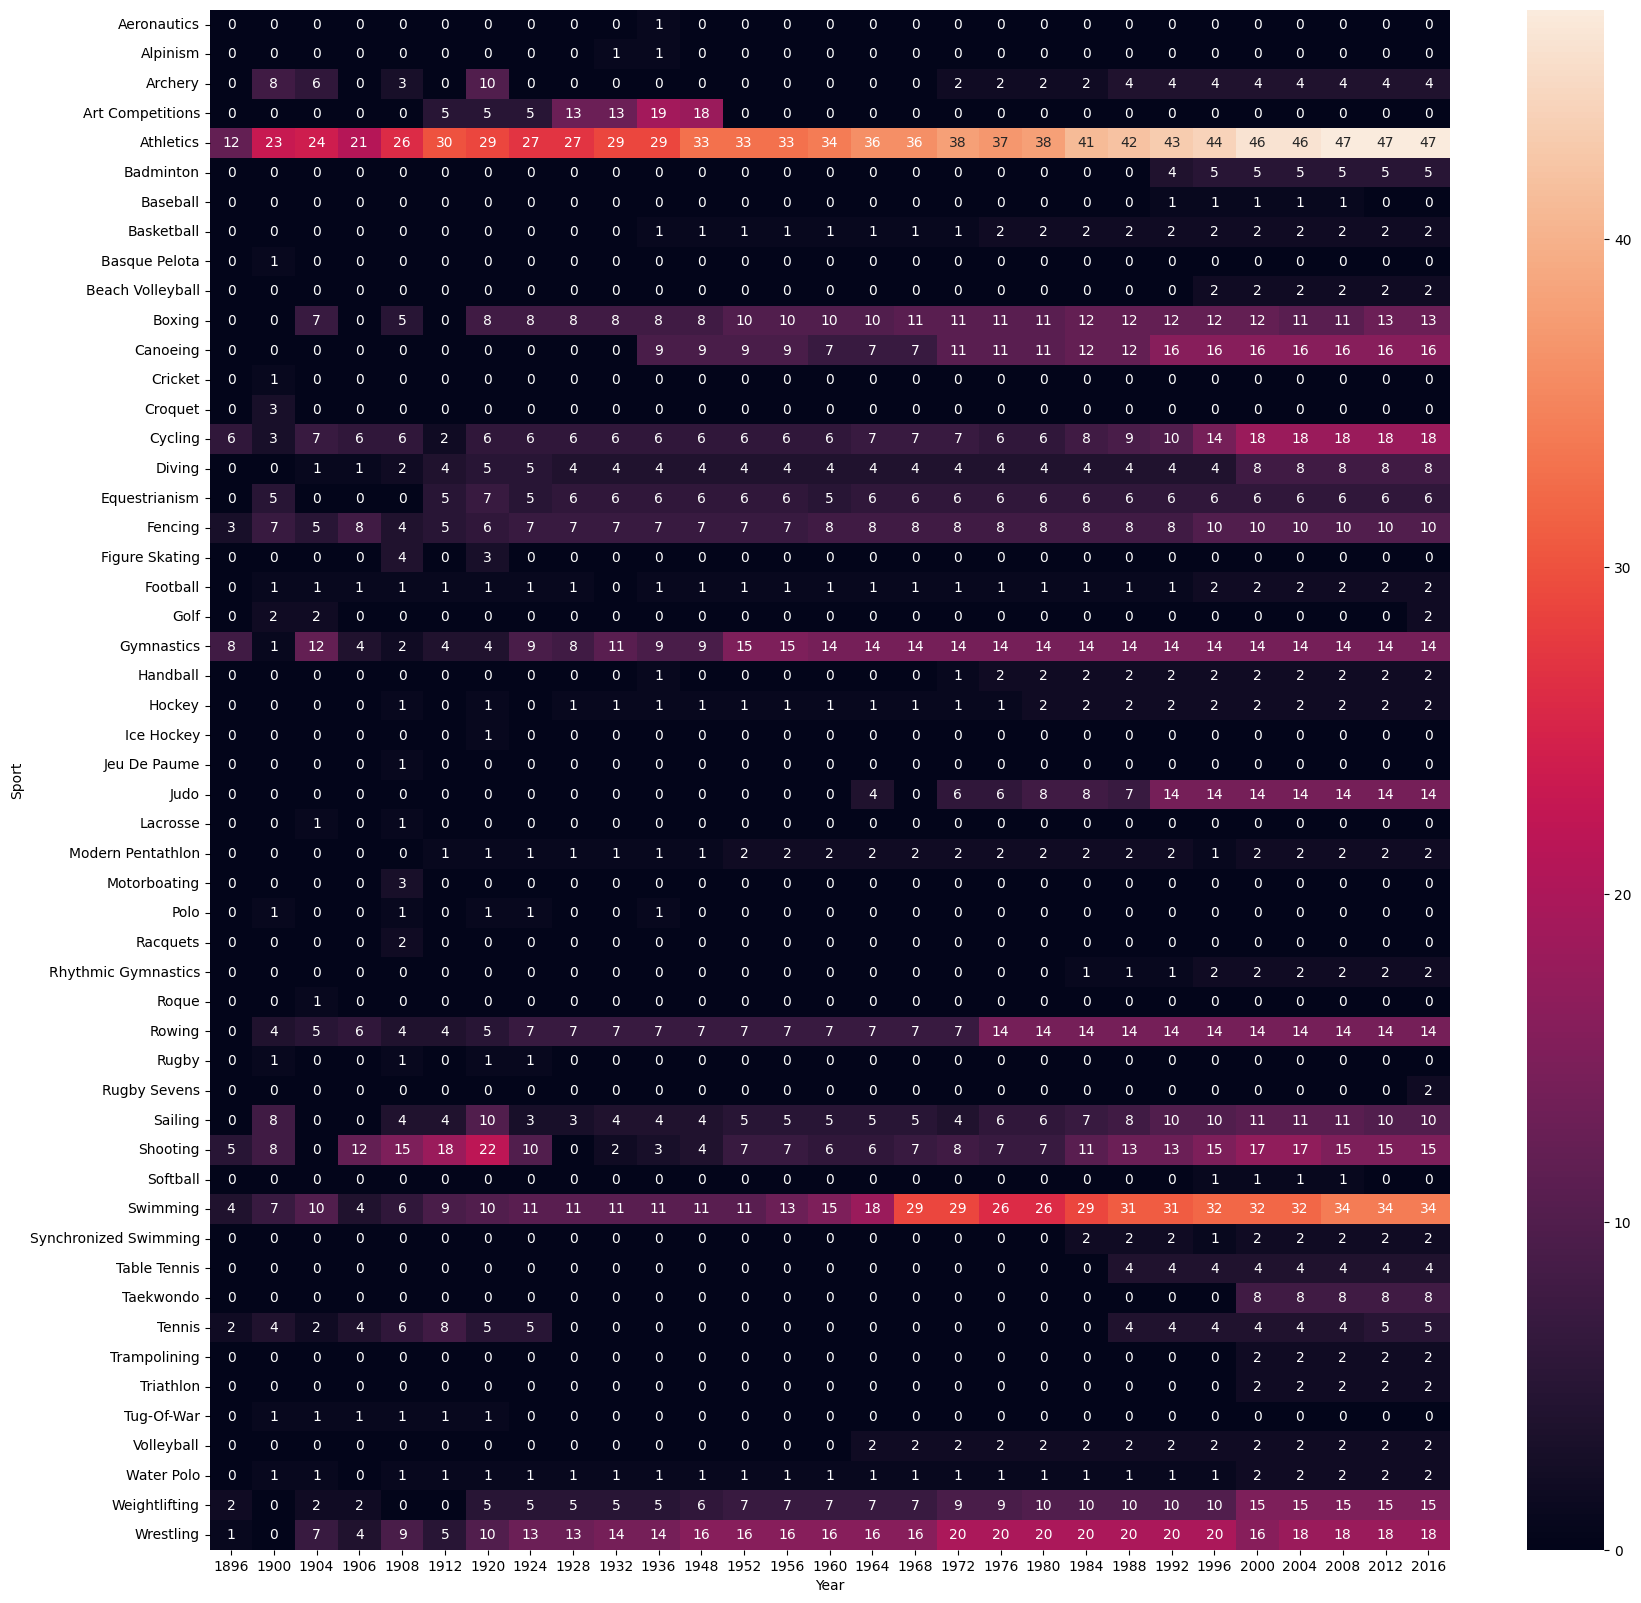

In [ ]:
x=df.drop_duplicates(["Year","Sport","Event"])
plt.figure(figsize=(20,20))
sns.heatmap(x.pivot_table(index="Sport",columns="Year",values="Event",aggfunc="count").fillna(0).astype("int"),annot=True)
#convert puvot tael data to int  fill nan with 0


In [ ]:
def most_successful(df,sport):
      temp_df=df.dropna(subset=["Medal"])
      if sport!="Overall":
          temp_df=temp_df[temp_df['Sport']==sport]

      x=temp_df["Name"].value_counts().reset_index().merge(df,on="Name",how="left")[["Name","count","Sport","region"]].drop_duplicates(["Name","Sport"])
      x.rename(columns={'count': 'Medals'}, inplace=True)
      return x.head(15)


most_successful(athlete_df,"Wrestling")



,Name,Medals,Sport,region
0,Wilfried Dietrich,5,Wrestling,Germany
8,Kaori Icho,4,Wrestling,Japan
12,Eino Aukusti Leino,4,Wrestling,Finland
16,Johan Rudolf Svensson,4,Wrestling,Sweden
20,Bruce Robert Baumgartner,4,Wrestling,USA
24,Imre Polyk,4,Wrestling,Hungary
28,Sren Marinus Jensen,4,Wrestling,Denmark
32,Saori Yoshida,4,Wrestling,Japan
36,Artur Borisovich Taymazov,4,Wrestling,Uzbekistan
40,Aleksandr Aleksandrovich Karelin,4,Wrestling,Russia


In [ ]:
athlete_df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN


In [ ]:
athlete_df.sample()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
33036,16998,Derya Bykuncu,M,28.0,190.0,90.0,Turkey,TUR,2004 Summer,2004,Summer,Athina,Swimming,Swimming Men's 200 metres Backstroke,NaN,Turkey,NaN


In [ ]:
medal_count =athlete_df["Name"].value_counts().reset_index()
# medal_count.columns = ["Name", "Medals"]

In [ ]:
medal_count = medal_count.drop_duplicates(subset=["Name"]).head(15)
medal_count

,Name,count
0,Robert Tait McKenzie,58
1,Heikki Ilmari Savolainen,39
2,"Joseph ""Josy"" Stoffel",38
3,Ioannis Theofilakis,36
4,Takashi Ono,33
5,Andreas Wecker,32
6,Alexandros Theofilakis,32
7,Alfrd (Arnold-) Hajs (Guttmann-),32
8,Jean Lucien Nicolas Jacoby,32
9,Michel Mathiot,31


In [ ]:
df=athlete_df

In [ ]:
country_plot_df=df.dropna(subset=["Medal"])
country_plot_df.drop_duplicates(subset=["Team","NOC","Games","Year","City","Sport","Event","Medal"],inplace=True)
country_plot=country_plot_df[country_plot_df["region"]=="India"]
final_plot_df=country_plot.groupby("Year").count()["Medal"].reset_index()
country_wise=px.line(final_plot_df,x="Year",y="Medal")
country_wise.show()

<ipython-input-26-b9fce52d526d>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<ipython-input-35-1c9de6cb1316>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<Axes: xlabel='Year', ylabel='Sport'>

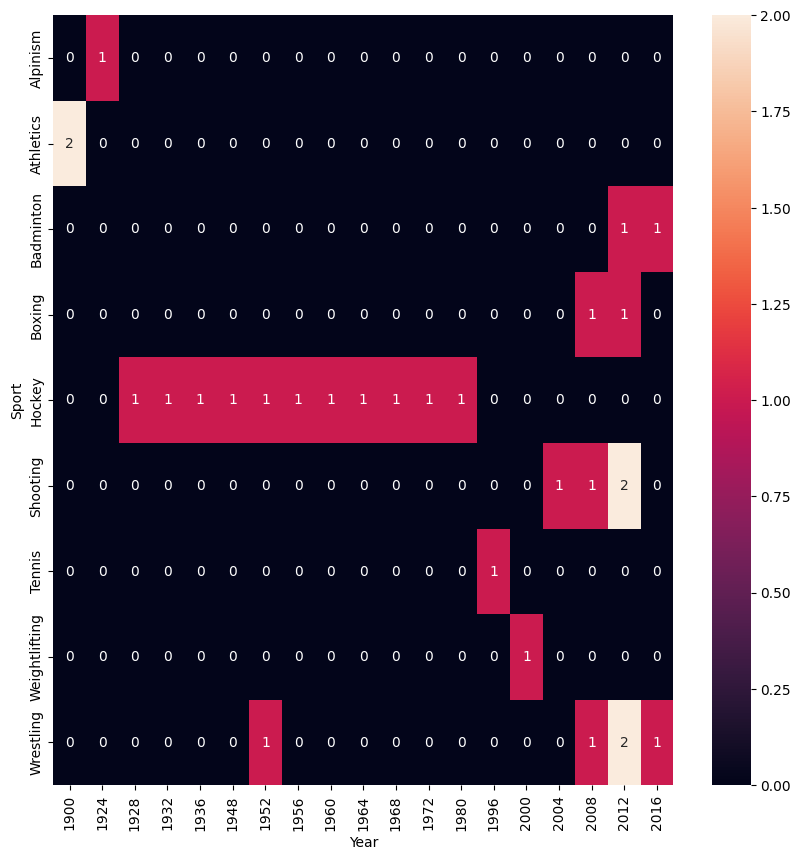

In [ ]:
 country_plot_df=df.dropna(subset=["Medal"])
country_plot_df.drop_duplicates(subset=["Team","NOC","Games","Year","City","Sport","Event","Medal"],inplace=True)
country_plot=country_plot_df[country_plot_df["region"]=="India"]
plt.figure(figsize=(10,10))
sns.heatmap(country_plot.pivot_table(index="Sport",columns="Year" ,values="Medal",aggfunc="count").fillna(0),annot=True)

In [3]:
import plotly.figure_factory as ff

In [9]:
athletes_df=df.drop_duplicates(subset=["Name","NOC"])
x1=athletes_df["Age"].dropna()
x2=athletes_df[athletes_df["Medal"]=="Gold"]["Age"].dropna()
x3=athletes_df[athletes_df["Medal"]=="Silver"]["Age"].dropna()
x4=athletes_df[athletes_df["Medal"]=="Bronze"]["Age"].dropna()

fig=ff.create_distplot([x1,x2,x3,x4],["Overall Age","Gold Medalist","Silver Medalist","Bronze Medalist"],show_hist=False,show_rug=False)
fig.show()
